In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#%autoreload

## Data Import

In [3]:
df = pd.read_csv('raw_data/train.csv')

In [4]:
df.head(5)

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,...,t_50m:C,relative_humidity_50m:p,dew_point_50m:C,wind_speed_50m:ms,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d
0,2020-01-01 13:00:00,0.0,40.59,26.514689,0.28969,0.0,0.0,1.0,10.0,64826.0,...,8.4,60.7,1.3,8.4,246.3,8.3,60.3,1.0,10.4,247.3
1,2020-01-01 14:00:00,0.0,67.86,28.326960,0.29561,0.0,0.0,1.0,0.0,8961.1,...,8.4,61.6,1.5,8.0,252.3,8.4,60.7,1.2,10.0,252.1
2,2020-01-01 15:00:00,0.0,116.68,23.682207,0.30044,0.0,0.0,1.0,0.0,0.0,...,8.5,60.3,1.3,9.6,254.1,8.4,59.6,1.0,11.7,253.8
3,2020-01-01 16:00:00,0.0,120.22,25.354782,0.29975,0.0,0.0,1.0,0.0,0.0,...,8.4,63.9,2.0,12.1,254.6,8.3,63.4,1.7,14.3,254.2
4,2020-01-01 17:00:00,0.0,109.86,23.861942,0.29650,0.0,0.0,1.0,0.0,0.0,...,7.2,78.9,3.8,11.7,249.5,7.1,77.9,3.5,13.9,249.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      9515 non-null   object 
 1   pv_production             9515 non-null   float64
 2   wind_production           9515 non-null   float64
 3   consumption               9515 non-null   float64
 4   spot_market_price         9515 non-null   float64
 5   precip_1h:mm              9515 non-null   float64
 6   precip_type:idx           9515 non-null   float64
 7   prob_precip_1h:p          9515 non-null   float64
 8   clear_sky_rad:W           9515 non-null   float64
 9   clear_sky_energy_1h:J     9515 non-null   float64
 10  diffuse_rad:W             9515 non-null   float64
 11  diffuse_rad_1h:Wh         9515 non-null   float64
 12  direct_rad:W              9515 non-null   float64
 13  direct_rad_1h:Wh          9515 non-null   float64
 14  global_r

# Split train test

In [ ]:
# # Defining the features and the target

# X = data.drop(columns='charges')
# y = data['charges']

# # Train-Test split

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Preprocessing Pipelines

from sklearn.pipeline import Pipeline

In [ ]:
💻 Let's perform the following operations in parallel:
🔢 Impute then scale numerical values
🔠 Encode categorical values

In [ ]:
# # Preprocess "age"
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler

# # Build the pipeline with the different steps
# pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy="median")),
#     ('standard_scaler', StandardScaler())
# ])

# pipeline.fit(X_train)
# pipeline.transform(X_train)

In [ ]:
# from sklearn.compose import ColumnTransformer

# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler

# from sklearn.preprocessing import OneHotEncoder


# # Impute then scale numerical values:
# num_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy="mean")),
#     ('standard_scaler', StandardScaler())
# ])

# # Encode categorical values
# cat_transformer = OneHotEncoder(handle_unknown='ignore')

# # Parallelize "num_transformer" and "cat_transfomer"
# preprocessor = ColumnTransformer([
#     ('num_transformer', num_transformer, ['age', 'bmi']),
#     ('cat_transformer', cat_transformer, ['smoker', 'region'])
# ])

## Fit_transform on train set

In [ ]:

# X_train_transformed = preprocessor.fit_transform(X_train)

# print("Original training set")
# display(X_train.head(3))

# print("Preprocessed training set")
# display(pd.DataFrame(X_train_transformed).head(3))

## Fit_transform on train and test set

In [ ]:
#X_train_transformed = preprocessor.fit(X_train).transform(X_test)

In [ ]:
# # Get your features' names
# preprocessor.get_feature_names_out()
# pd.DataFrame(
#     X_train_transformed,
#     columns=preprocessor.get_feature_names_out()
# ).head()

remainder=passthrough - keep columns untouched

In [ ]:
# preprocessor = ColumnTransformer([
#     ('num_transformer', num_transformer, ['age','bmi']),
#     ('cat_transformer', cat_transformer, ['region','smoker'])],
#     remainder='passthrough'
# )

# preprocessor

In [ ]:
# num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
# cat_transformer = OneHotEncoder()

# preproc_basic = make_column_transformer(
#     (num_transformer, ['age', 'bmi']),
#     (cat_transformer, ['smoker', 'region']),
#     remainder='passthrough'
# )

# preproc_full = make_union(preproc_basic, bmi_age_ratio_constructor) # for custom feature engineering

# preproc_full

# Data Exploration 

## Total cloud cover

In [25]:
sorted(df.columns)

['clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'consumption',
 'dew_point_100m:C',
 'dew_point_10m:C',
 'dew_point_2m:C',
 'dew_point_50m:C',
 'diffuse_rad:W',
 'diffuse_rad_1h:Wh',
 'direct_rad:W',
 'direct_rad_1h:Wh',
 'effective_cloud_cover:p',
 'global_rad:W',
 'global_rad_1h:Wh',
 'high_cloud_cover:p',
 'low_cloud_cover:p',
 'medium_cloud_cover:p',
 'precip_1h:mm',
 'precip_type:idx',
 'prob_precip_1h:p',
 'pv_production',
 'relative_humidity_100m:p',
 'relative_humidity_10m:p',
 'relative_humidity_2m:p',
 'relative_humidity_50m:p',
 'spot_market_price',
 'sun_azimuth:d',
 'sun_elevation:d',
 'sunshine_duration_1h:min',
 't_100m:C',
 't_10m:C',
 't_50m:C',
 'temp',
 'time',
 'total_cloud_cover:p',
 'wind_dir_100m:d',
 'wind_dir_10m:d',
 'wind_dir_2m:d',
 'wind_dir_50m:d',
 'wind_production',
 'wind_speed_100m:ms',
 'wind_speed_10m:ms',
 'wind_speed_2m:ms',
 'wind_speed_50m:ms']

In [10]:
df['total_cloud_cover:p'].describe()

count    9515.000000
mean       73.717373
std        33.829706
min         0.000000
25%        52.800000
50%        93.000000
75%        99.800000
max       100.000000
Name: total_cloud_cover:p, dtype: float64

In [11]:
df[['low_cloud_cover:p', 'medium_cloud_cover:p','high_cloud_cover:p', 'total_cloud_cover:p', 'effective_cloud_cover:p']].head(10)

,low_cloud_cover:p,medium_cloud_cover:p,high_cloud_cover:p,total_cloud_cover:p,effective_cloud_cover:p
0,13.2,56.7,97.4,99.0,80.7
1,1.3,61.5,100.0,100.0,81.0
2,3.4,92.3,100.0,100.0,96.3
3,32.1,97.5,100.0,100.0,99.1
4,92.2,98.6,100.0,100.0,99.9
5,82.6,95.0,100.0,100.0,99.6
6,94.3,100.0,100.0,100.0,100.0
7,92.3,100.0,100.0,100.0,100.0
8,54.7,100.0,100.0,100.0,100.0
9,10.5,100.0,100.0,100.0,100.0


In [12]:
df[['low_cloud_cover:p', 'medium_cloud_cover:p','high_cloud_cover:p', 'total_cloud_cover:p', 'effective_cloud_cover:p']].describe()

,low_cloud_cover:p,medium_cloud_cover:p,high_cloud_cover:p,total_cloud_cover:p,effective_cloud_cover:p
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000
mean,30.421881,49.207651,43.867241,73.717373,66.967399
std,33.466052,39.684695,42.520553,33.829706,33.886983
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,3.600000,0.000000,52.800000,44.000000
50%,17.200000,49.600000,31.800000,93.000000,79.100000
75%,53.350000,92.500000,93.800000,99.800000,98.200000
max,100.000000,100.000000,100.000000,100.000000,100.000000


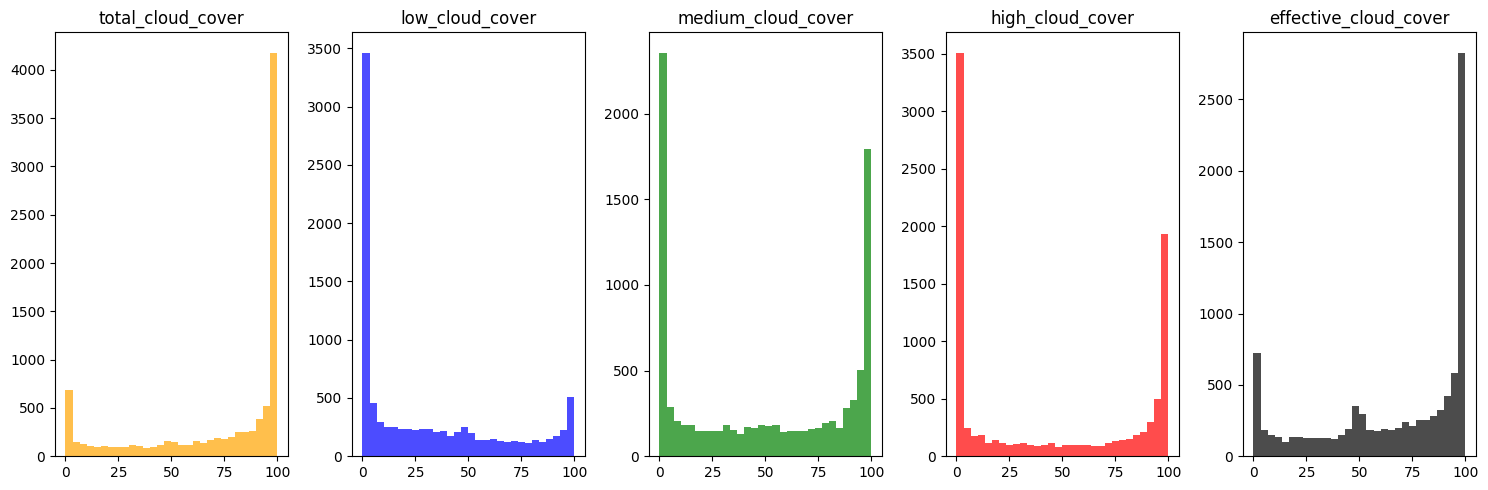

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns

axes[0].hist(df['total_cloud_cover:p'], bins=30, color='orange', alpha=0.7)
axes[0].set_title('total_cloud_cover')

axes[1].hist(df['low_cloud_cover:p'], bins=30, color='blue', alpha=0.7)
axes[1].set_title('low_cloud_cover')

axes[2].hist(df['medium_cloud_cover:p'], bins=30, color='green', alpha=0.7)
axes[2].set_title('medium_cloud_cover')

axes[3].hist(df['high_cloud_cover:p'], bins=30, color='red', alpha=0.7)
axes[3].set_title('high_cloud_cover')

axes[4].hist(df['effective_cloud_cover:p'], bins=30, color='black', alpha=0.7)
axes[4].set_title('effective_cloud_cover')

plt.tight_layout()
plt.show()


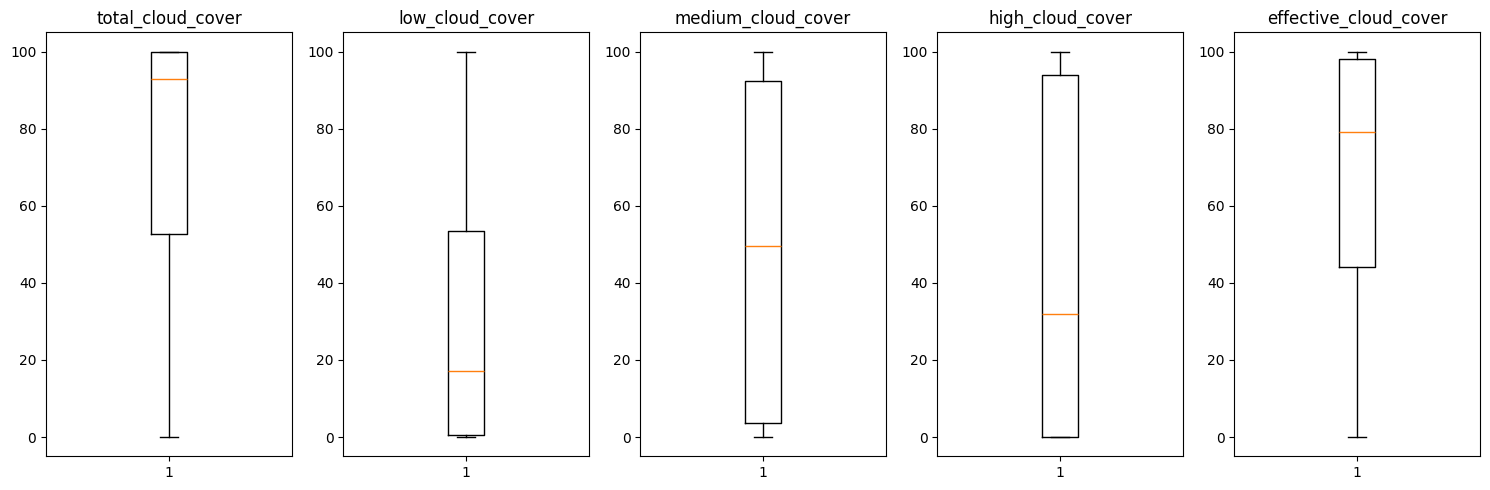

In [14]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns

axes[0].boxplot(df['total_cloud_cover:p'])
axes[0].set_title('total_cloud_cover')

axes[1].boxplot(df['low_cloud_cover:p'])
axes[1].set_title('low_cloud_cover')

axes[2].boxplot(df['medium_cloud_cover:p'])
axes[2].set_title('medium_cloud_cover')

axes[3].boxplot(df['high_cloud_cover:p'])
axes[3].set_title('high_cloud_cover')

axes[4].boxplot(df['effective_cloud_cover:p'])
axes[4].set_title('effective_cloud_cover')

plt.tight_layout()
plt.show()


## Sun elevation

In [15]:
df['sun_elevation:d'].describe()

count    9515.000000
mean       -1.281287
std        24.429422
min       -49.944000
25%       -18.737500
50%        -1.010000
75%        15.566000
max        49.879000
Name: sun_elevation:d, dtype: float64

Text(0.5, 1.0, 'sun_elevation')

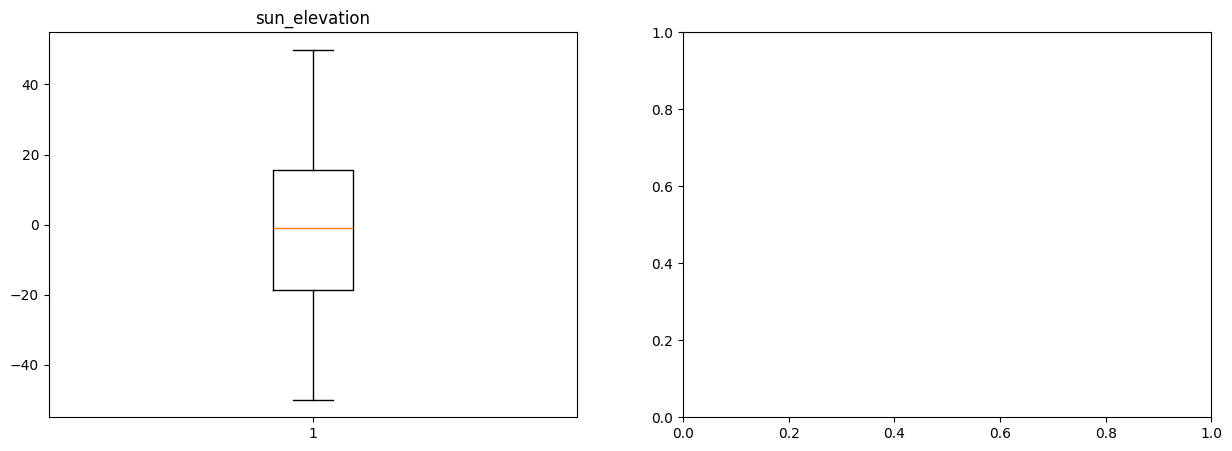

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 5 columns

axes[0].boxplot(df['sun_elevation:d'])
axes[0].set_title('sun_elevation')

Text(0.5, 1.0, 'sun_elevation')

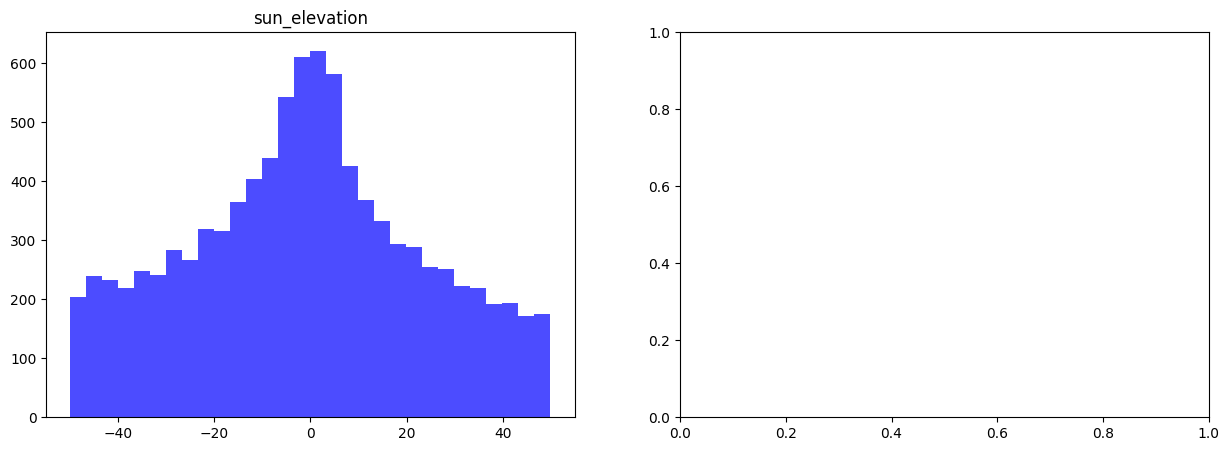

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 5 columns

axes[0].hist(df['sun_elevation:d'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('sun_elevation')

## Temp in Celicus at 10, 50 or 100 meters above ground

In [21]:
df['t_10m:C'].describe()

count    9515.000000
mean        5.662186
std         7.075424
min       -15.500000
25%         1.200000
50%         4.600000
75%        10.300000
max        29.600000
Name: t_10m:C, dtype: float64

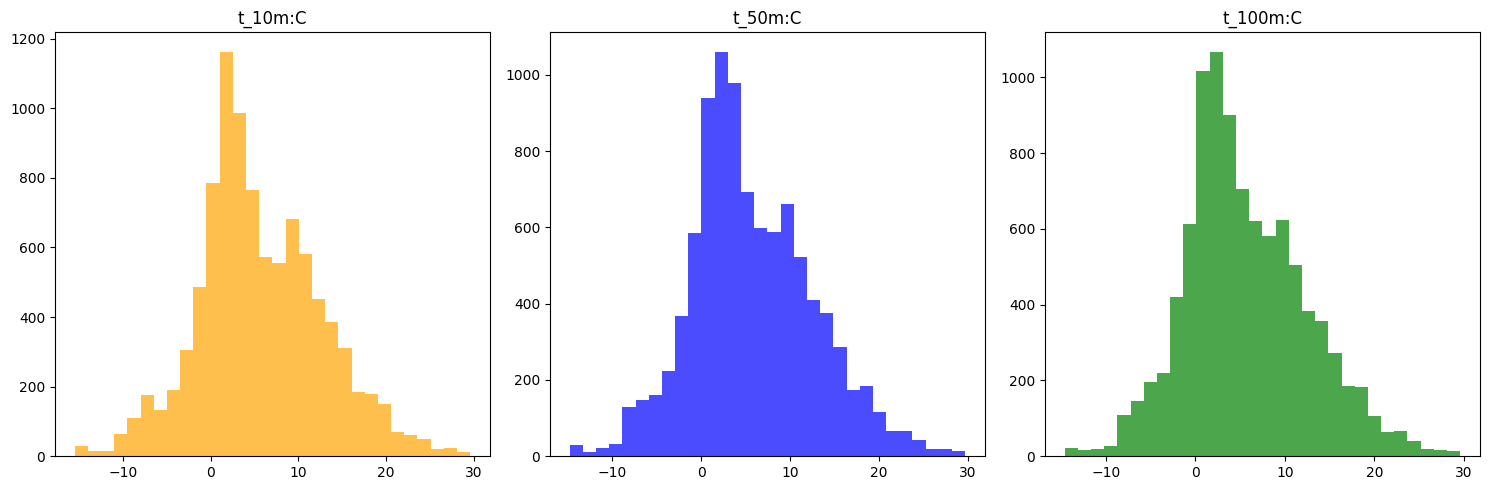

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 5 columns

axes[0].hist(df['t_10m:C'], bins=30, color='orange', alpha=0.7)
axes[0].set_title('t_10m:C')

axes[1].hist(df['t_50m:C'], bins=30, color='blue', alpha=0.7)
axes[1].set_title('t_50m:C')

axes[2].hist(df['t_100m:C'], bins=30, color='green', alpha=0.7)
axes[2].set_title('t_100m:C')

plt.tight_layout()
plt.show()

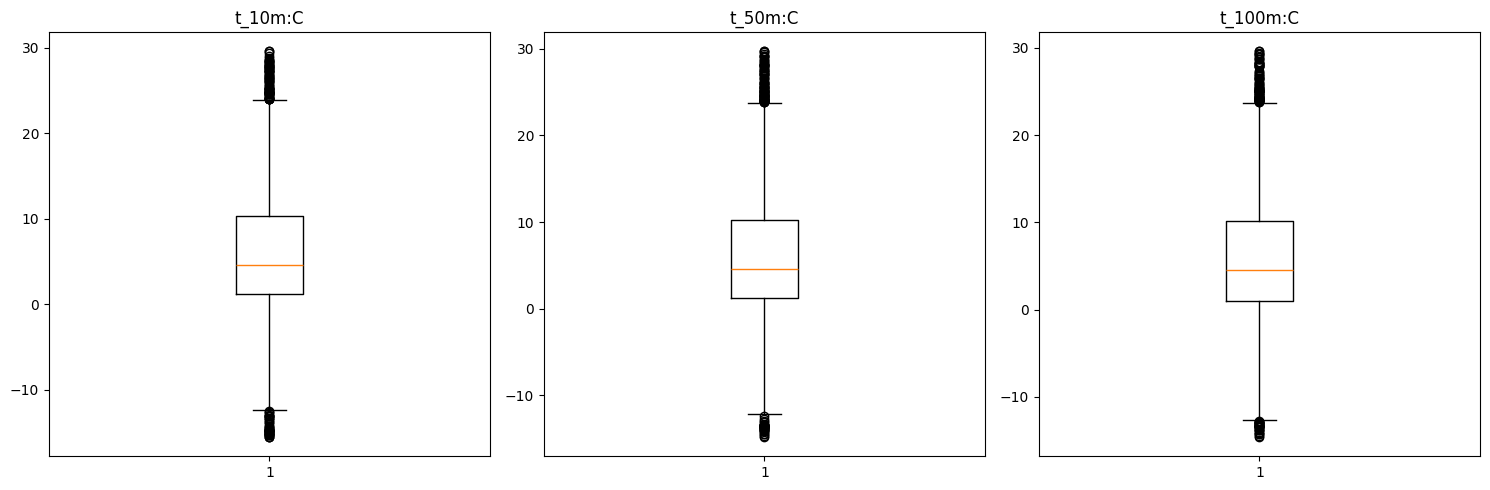

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 5 columns

axes[0].boxplot(df['t_10m:C'])
axes[0].set_title('t_10m:C')

axes[1].boxplot(df['t_50m:C'])
axes[1].set_title('t_50m:C')

axes[2].boxplot(df['t_100m:C'])
axes[2].set_title('t_100m:C')


plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from sklearn.preprocessing import RobustScaler


df = df[['t_10m:C', 't_50m:C', 't_100m:C']]

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform selected columns
columns_to_scale = ['t_10m:C', 't_50m:C', 't_100m:C']
df_scaled = df.copy()  # To keep the original data intact
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("Original DataFrame:\n", df)
print("\nScaled DataFrame:\n", df_scaled)


Original DataFrame:
       t_10m:C  t_50m:C  t_100m:C
0         8.3      8.4       8.3
1         8.2      8.4       8.4
2         8.4      8.5       8.4
3         8.3      8.4       8.3
4         7.1      7.2       7.1
...       ...      ...       ...
9510     -3.6     -3.2      -3.1
9511     -4.1     -3.5      -3.3
9512     -4.3     -3.6      -3.3
9513     -4.5     -3.7      -3.4
9514     -4.9     -4.0      -3.5

[9515 rows x 3 columns]

Scaled DataFrame:
        t_10m:C   t_50m:C  t_100m:C
0     0.406593  0.422222  0.417582
1     0.395604  0.422222  0.428571
2     0.417582  0.433333  0.428571
3     0.406593  0.422222  0.417582
4     0.274725  0.288889  0.285714
...        ...       ...       ...
9510 -0.901099 -0.866667 -0.835165
9511 -0.956044 -0.900000 -0.857143
9512 -0.978022 -0.911111 -0.857143
9513 -1.000000 -0.922222 -0.868132
9514 -1.043956 -0.955556 -0.879121

[9515 rows x 3 columns]
